#### Unsupervised learning algorithm is just shown the input data, and asked to extract knowledge from this data.

# Clustering

In [6]:
from sklearn.datasets import make_moons
from matplotlib.pylab import plt
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

1) KMeans

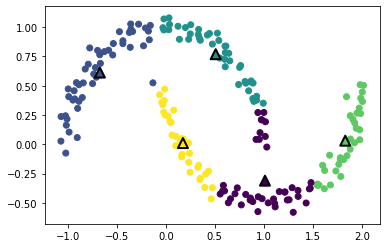

In [17]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
km.fit(X)
plt.scatter(X[:,0],X[:,1],c=km.predict(X))
# or
#plt.scatter(X[:,0],X[:,1],c=km.labels_(X))
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
marker='^', s=100, linewidth=2,edgecolors='k', c=[0,1,2,3,4] )

2) MeanShift

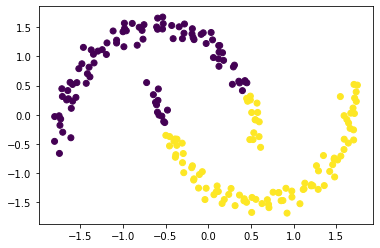

In [41]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
ms = MeanShift()
ms.fit(X_scaled)
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=ms.labels_)

3) Hierarchial

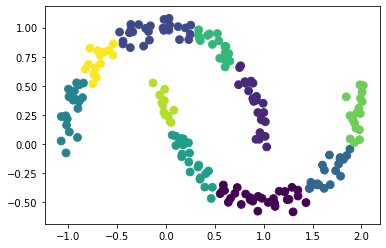

In [16]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=10)
fittransform = agc.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=fittransform , s=60)

4) DBSCAN

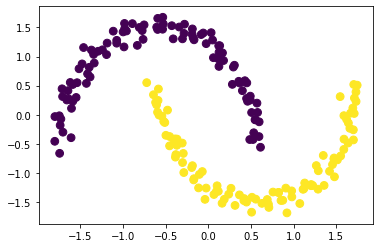

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
db = DBSCAN(eps=0.5,min_samples=5)
dbf=db.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbf , s=60)

In [37]:
from sklearn.metrics.cluster import adjusted_rand_score
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

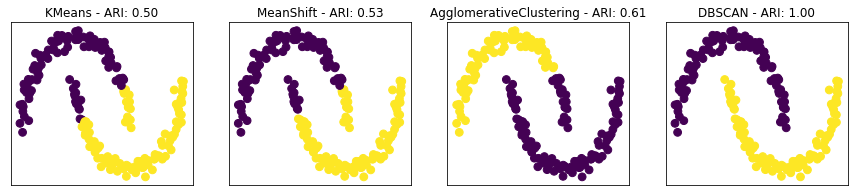

In [43]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),subplot_kw={'xticks': (), 'yticks': ()})
algorithms = [KMeans(n_clusters=2),MeanShift(),AgglomerativeClustering(n_clusters=2), DBSCAN()]
for ax, algorithm in zip(axes, algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
    ax.set_title("%s - ARI: %.2f" % (algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

# Decomposition

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()

1) Principal Component Analysis (PCA)

applying rotation and then droping directons

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xp=pca.fit_transform(iris.data)
print('mean shape:',iris.data.shape,'reduced shape:',Xp.shape)

mean shape: (150, 4) reduced shape: (150, 2)


2) Non-Negative Matrix Factorization (NMF)

want to both the components and the coefficients to be non-negative

In [3]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15,random_state=0)
Xmf=nmf.fit_transform(iris.data)
print('mean shape:',iris.data.shape,'reduced shape:',Xmf.shape)

mean shape: (150, 4) reduced shape: (150, 15)


# Manifold

The idea behind t-SNE is to find a two-dimensional representation of the data that
preserve the distances between points as best as possible

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()

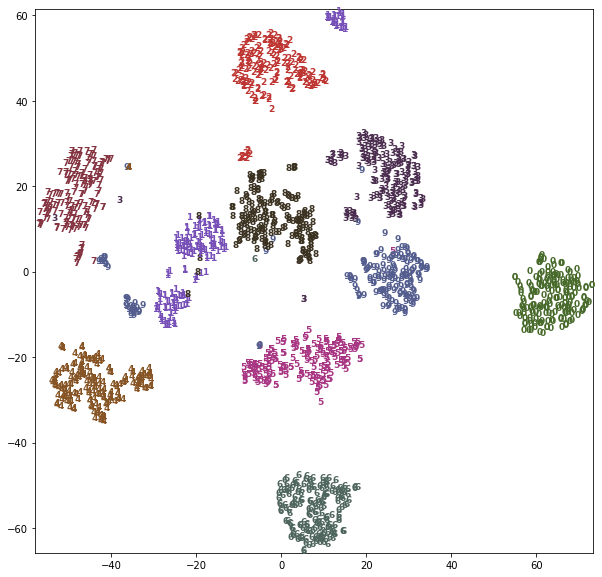

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method:
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
# actually plot the digits as text instead of using scatter
      plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
color = colors[digits.target[i]],
      fontdict={'weight': 'bold', 'size': 9})